# Del 2 – Strukturerad analys av hälsodata

I denna notebook använder jag kod från mina Python-filer:
- `health_analyzer.py` – klass för att analysera hälsodata
- `stats_functions.py` – hjälpfunktioner för statistik och linjär algebra
- `plotting.py` – funktioner för grafer


In [1]:
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from analysis.health_analyzer import HealthAnalyzer
import analysis.stats_functions as sf
import analysis.plotting as pl


## Ladda in data

In [2]:
df = pd.read_csv("health_study_dataset.csv")
df.head()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


## Grundläggande statistik via klassen och funktionerna

Här återanvänder jag analysen från Del 1, men i stället för att ha all kod i notebooken
anropar jag mina funktioner/klass.

In [3]:
analyzer = HealthAnalyzer(df)
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]
basic_stats = sf.summary_statistics(df, columns)
basic_stats

{'age': {'mean': 49.42625, 'median': 50.0, 'min': 18.0, 'max': 90.0},
 'weight': {'mean': 73.413, 'median': 73.2, 'min': 33.7, 'max': 114.4},
 'height': {'mean': 171.84925000000004,
  'median': 171.35000000000002,
  'min': 144.4,
  'max': 200.4},
 'systolic_bp': {'mean': 149.178625,
  'median': 149.4,
  'min': 106.8,
  'max': 185.9},
 'cholesterol': {'mean': 4.92915, 'median': 4.97, 'min': 2.5, 'max': 7.88}}

## Linjär regression med numpy (linjär algebra)

Här gör jag en enkel linjär regression där jag förutsäger systoliskt blodtryck
från ålder och vikt.


In [4]:
reg_result = analyzer.regression_age_weight()
reg_result

{'beta': array([109.49908145,   0.53892763,   0.17765752]),
 'y_pred': array([151.90782144, 151.86603653, 155.89926007, 164.84178628,
        152.78390057, 146.47705855, 163.58637294, 151.52302941,
        146.64866155, 152.71323536, 145.81962627, 150.22553281,
        152.73675728, 138.29806189, 137.71189151, 142.82306977,
        140.82715156, 151.69453297, 144.44550939, 140.68482664,
        162.57958068, 148.76884058, 155.35417847, 131.35780674,
        143.5514656 , 152.52942387, 145.15008496, 148.71584167,
        147.41844452, 150.82371277, 139.22843276, 164.17869728,
        151.18508233, 145.62390465, 154.78011713, 135.63945247,
        154.61992701, 135.75160426, 139.16888209, 152.46431593,
        154.34778401, 149.26648054, 148.15894939, 148.95830879,
        138.35155804, 145.92016627, 141.48478273, 157.28518763,
        152.67760441, 137.10190087, 153.63099996, 146.98035523,
        148.47843458, 150.03656184, 157.35625064, 157.34434051,
        137.59388411, 147.00407605

## Visualisering: Blodtryck vs ålder med regressionslinje


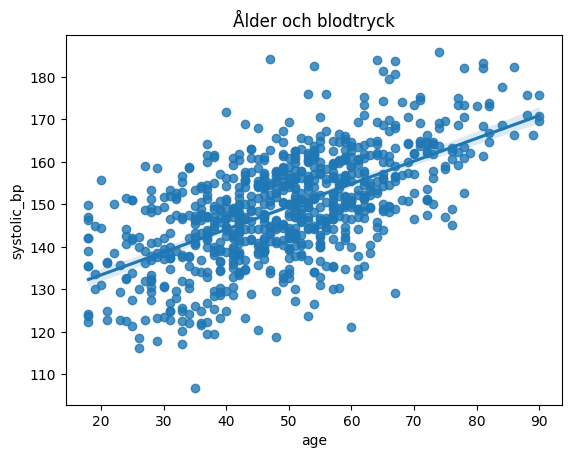

In [5]:
fig, ax = plt.subplots()
pl.bp_vs_age(df)
